In [102]:
## CLassification model 1 : MNIST 
## MNIST is a data set of handwritten numbers containing a set of 70k numbers handwritten

from sklearn.datasets import fetch_openml
import numpy as np
mnist= fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [116]:
import pandas as pd

X,Y= mnist["data"],mnist["target"]
X.shape


(70000, 784)

In [117]:
Y.shape

(70000,)

In [128]:
x1=X.to_numpy()[0]
type(x1[0])
X.to_numpy()[0].reshape(28,28).reshape(1,784)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

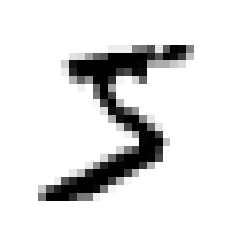

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [6]:
Y[0]

'5'

In [7]:
Y= Y.astype(np.uint8)

In [8]:
Y[0]

5

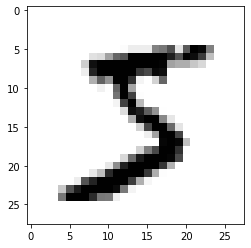

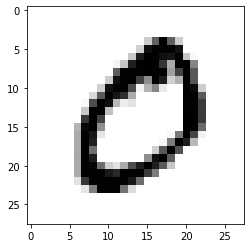

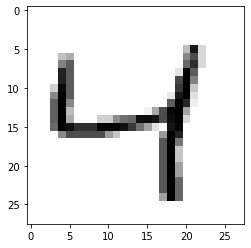

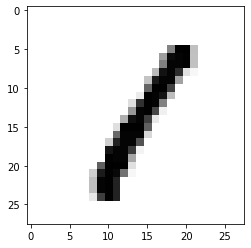

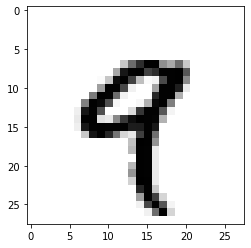

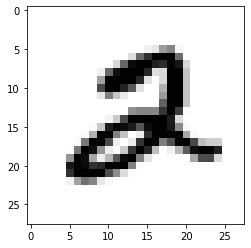

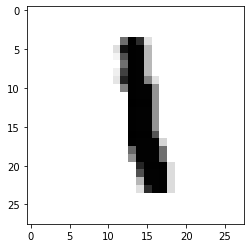

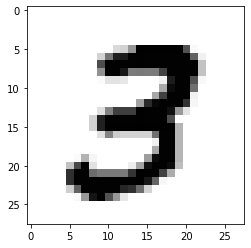

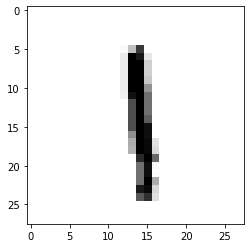

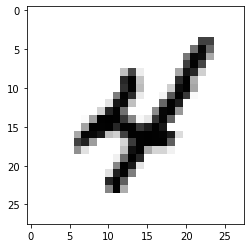

In [9]:
for i in range (0,10):
    some_digit = X.to_numpy()[i]
    some_digit_image=some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis("on")
    plt.show()

In [65]:
from math import floor
def test_train_split(X,Y,ratio):
    X_train,X_test,Y_train,Y_test = X[:floor((1-ratio)*X.shape[0])],X[floor((1-ratio)*X.shape[0]):],Y[:floor((1-ratio)*Y.size)],Y[floor((1-ratio)*Y.size):]
    return X_train,X_test,Y_train,Y_test
    
    

In [66]:
X_train,X_test,Y_train,Y_test= test_train_split(X,Y,0.15)

In [12]:
Y_train_5 = (Y_train==5)
Y_test_5 = (Y_test==5)


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_5)

sgd_clf.predict([X_train.to_numpy()[0]])

array([ True])

In [13]:
## creating cross validation score on our own

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits =3, random_state=42,shuffle=True)

def my_cross_val_score(X_train,Y_train):
    a=skfolds.split(X_train,Y_train)
    for train_index,test_index in a:
        X_train_fold = X_train.to_numpy()[train_index]
        X_test_fold = X_train.to_numpy()[test_index]
        Y_train_fold = Y_train[train_index]
        Y_test_fold = Y_train[test_index]
        
        clone_clf = clone(sgd_clf)
        clone_clf.fit(X_train_fold,Y_train_fold)
        preds=clone_clf.predict(X_test_fold)
        n_correct=sum(preds==Y_test_fold)
        print(n_correct/len(preds))
skfolds.split(X_train,Y_train_5)
        

<generator object _BaseKFold.split at 0x000001F172167C10>

In [14]:
my_cross_val_score(X_train,Y_train_5)

0.9375315115458304
0.9635960268239803
0.9698482327434075


In [15]:
from sklearn.model_selection import cross_val_predict

Y_train_preds = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3 )


from sklearn.metrics import confusion_matrix

confusion_matrix=confusion_matrix(Y_train_5,Y_train_preds)


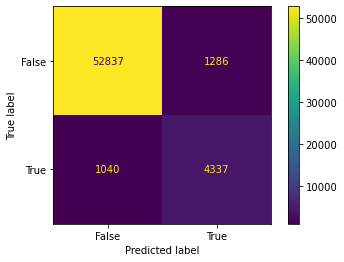

Precision: 0.7712964609638983


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display= ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()
precision_cm=confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print("Precision:",precision_cm)

In [17]:
from sklearn.metrics import roc_curve

Y_scores = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3,method='decision_function')




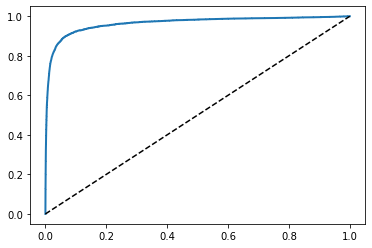

In [18]:

fpr,tpr,thresholds = roc_curve(Y_train_5,Y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr,tpr)
plt.show()

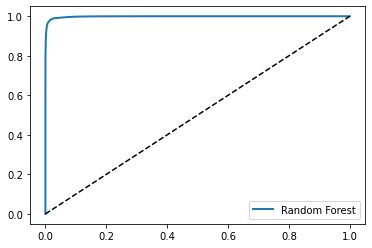

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf= RandomForestClassifier(random_state=42)

Y_probas_forest = cross_val_predict(forest_clf,X_train,Y_train_5,cv=3,method="predict_proba")

Y_forest_scores = Y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(Y_train_5,Y_forest_scores)

plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score,precision_score,recall_score

roc_auc_score(Y_train_5,Y_forest_scores)


0.9984578758504704

In [21]:
Y_forest_predict = cross_val_predict(forest_clf,X_train,Y_train_5,cv=3)



In [22]:

precision_score(Y_train_5,Y_forest_predict)


0.9895966029723992

In [23]:
recall_score(Y_train_5,Y_forest_predict)

0.8668402454900502

In [25]:
forest_clf.fit(X_train,Y_train)
forest_clf.predict([X.to_numpy()[0]])

array([5], dtype=uint8)

In [29]:
sgd_clf.fit(X_train,Y_train)


SGDClassifier(random_state=42)

In [30]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf= OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,Y_train)
ovo_clf.predict([X.to_numpy()[0]])

array([5], dtype=uint8)

In [31]:
sgd_clf.predict([X.to_numpy()[0]])

array([5], dtype=uint8)

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,Y_train,cv=3,scoring="accuracy")


array([0.87970152, 0.89401503, 0.88156103])

In [36]:
cross_val_score(forest_clf,X_train,Y_train,cv=3,scoring="accuracy")

array([0.96395079, 0.96193213, 0.96652045])

In [37]:
cross_val_score(ovo_clf,X_train,Y_train,cv=3,scoring="accuracy")

array([0.91509529, 0.9205869 , 0.91584733])

In [38]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))

In [40]:
cross_val_score(forest_clf,X_train_scaled,Y_train,cv=3,scoring='accuracy')

array([0.96405163, 0.96193213, 0.96667171])

In [41]:
Y_train_preds = cross_val_predict(forest_clf,X_train_scaled,Y_train,cv=3)

In [44]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(Y_train,Y_train_preds)


In [45]:
conf_mx

array([[5801,    1,    8,    3,    5,    7,   15,    1,   33,    3],
       [   0, 6579,   39,   18,   12,    2,    6,   12,   14,    6],
       [  29,   13, 5698,   27,   29,    4,   20,   42,   38,    6],
       [   8,    5,   87, 5758,    2,   70,    9,   56,   64,   24],
       [  11,   12,   12,    1, 5599,    0,   29,   10,   16,  101],
       [  24,    8,   11,   63,   10, 5153,   43,    8,   38,   19],
       [  29,   11,    7,    0,    9,   41, 5747,    0,   19,    0],
       [   8,   22,   66,    6,   36,    1,    0, 5982,    9,   80],
       [   9,   32,   42,   64,   23,   54,   27,    4, 5482,   68],
       [  23,   11,   18,   77,   74,   19,    6,   54,   46, 5572]],
      dtype=int64)

<Figure size 1440x1440 with 0 Axes>

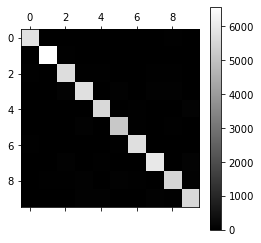

In [53]:
plt.figure(figsize=[20,20])
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.colorbar()
plt.show()

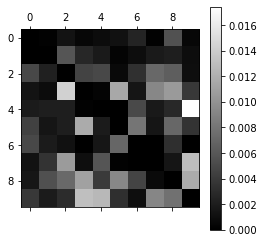

In [55]:
row_sum=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sum
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [85]:
forest_clf.fit(X_train_scaled,Y_train)

RandomForestClassifier(random_state=42)

In [86]:
X_test_scaled=scaler.fit_transform(X_test.astype(np.float64))

In [87]:
test_predict=forest_clf.predict(X_test_scaled)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,test_predict)

0.9673333333333334

In [89]:
import pickle
pickle.dump(forest_clf,open("my_model_clf.pkl",'wb'))


In [90]:
loaded_model=pickle.load(open("my_model_clf.pkl",'rb'))

In [97]:
loaded_model.predict([X_train_scaled[25]])[0]

2

In [106]:
Y_train[25]

2

In [113]:
some_digit = X[0]
some_digit_image=some_digit.reshape(28,28)

KeyError: 0

In [115]:
X.shape()

TypeError: 'tuple' object is not callable